In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import annModels as am

In [2]:
file_path = '../../data/data.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])
#df = df.dropna()
df.head()

,Date,Inflation,CPI,Treasury_Yield,Open,High,Low,Close,SP500_Adj_Close,Volume,...,volatility,volatility_forcast,returns,EWMA_VM,GARCH_VM,EGARCH_VM,RogersSatchell_VM,garman_klass,parkinson,yang_zhang
0,2003-01-03,1.62,182.6,4.05,909.03,911.25,903.07,908.59,908.59,1130800000,...,0.9058,2.5512,-0.0005,0.0116,0.0002,0.0182,0.0069,0.0064,0.0054,0.0090
1,2003-01-06,1.63,182.6,4.09,908.59,931.77,908.59,929.01,929.01,1435900000,...,2.5512,1.1827,0.0222,0.0112,0.0003,0.0267,0.0086,0.0112,0.0151,0.0252
2,2003-01-07,1.62,182.6,4.04,929.01,930.81,919.93,922.93,922.93,1545200000,...,1.1827,1.6085,-0.0066,0.0122,0.0003,0.0376,0.0070,0.0072,0.0071,0.0118
3,2003-01-08,1.71,182.6,4.00,922.93,922.93,908.32,909.93,909.93,1467600000,...,1.6085,2.0199,-0.0142,0.0119,0.0004,0.0512,0.0053,0.0070,0.0096,0.0160
4,2003-01-09,1.78,182.6,4.19,909.93,928.31,909.93,927.57,927.57,1560300000,...,2.0199,1.6597,0.0192,0.0121,0.0004,0.0675,0.0040,0.0076,0.0120,0.0200


In [4]:
target = 'volatility_forcast'
date='Date'

df=df.drop(columns=[date])

X = df.drop(columns=[target])
y = df[target]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

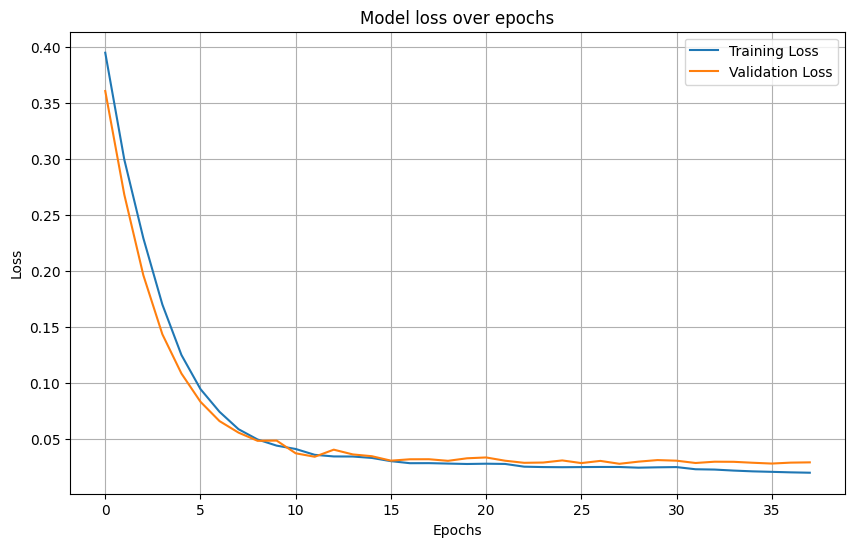

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

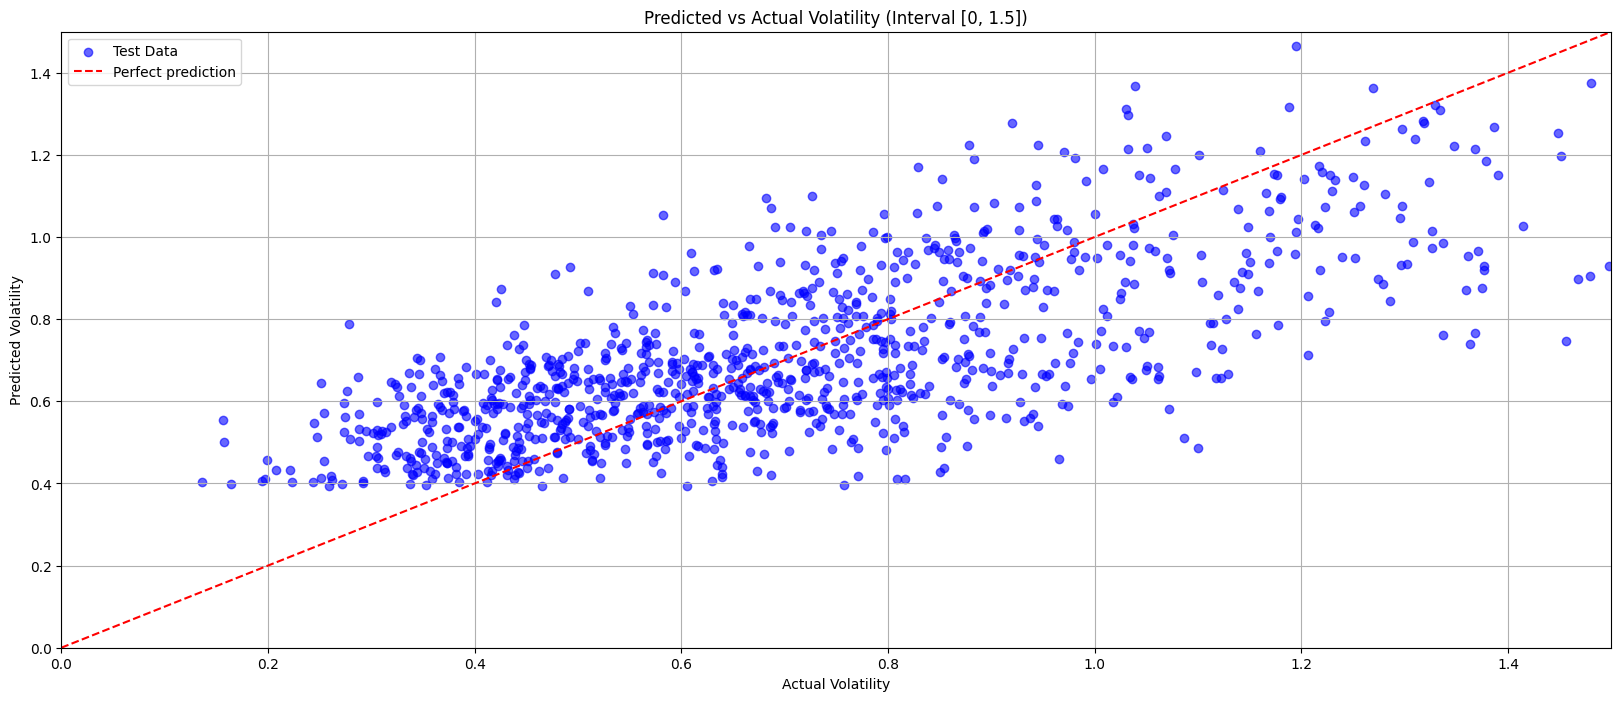

In [14]:
plt.figure(figsize=(20, 8))
plt.scatter(y_test, y_pred, alpha=0.6, label='Test Data', color='blue')

max_value = max(1.5, 1.5)
min_value = max(0, 0)
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect prediction')

plt.xlim(0, 1.5)
plt.ylim(0, 1.5)

plt.title("Predicted vs Actual Volatility (Interval [0, 1.5])")
plt.xlabel("Actual Volatility")
plt.ylabel("Predicted Volatility")
plt.legend()
plt.grid()

plt.show()


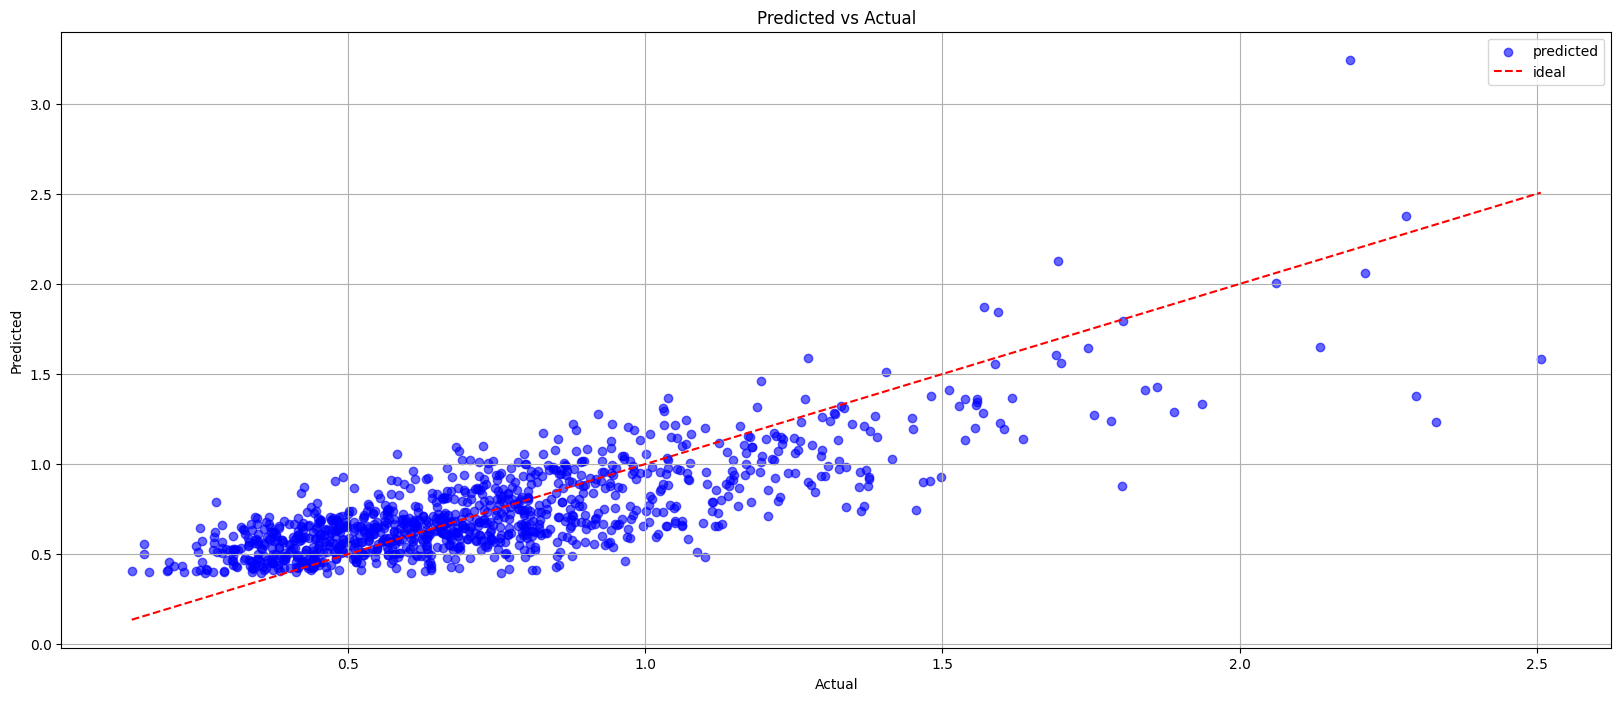

In [15]:
plt.figure(figsize=(20, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="ideal")
plt.title("Predicted vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.grid(True)
plt.show()
